In [1]:
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
from mmaction.datasets import MixupBlending

/home/sadat/miniconda3/envs/mmsign/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sadat/miniconda3/envs/mmsign/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [2]:
from flow_dataset import MultiModalDataset

In [3]:
dataset = MultiModalDataset(ann_file='data/autsl/train_annotations.txt',
                            root_dir='data/autsl/rawframes',
                            clip_len=32,
                            resolution=224,
                            modalities=('rgb'),
                            test_mode=False,
                            frame_interval=1,
                            input_resolution=512,
                            num_clips=1
                            )

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=dataset,
                                                batch_size=4,
                                                shuffle=True,
                                                num_workers=4,
                                                pin_memory=True)

In [5]:
iter_ = iter(train_loader)

In [6]:
imgs = next(iter_)
imgs['rgb'] = imgs['rgb'].unsqueeze(dim=1)
imgs['label'] = imgs['label'].unsqueeze(dim=1)
imgs['label'].shape

torch.Size([4, 1])

In [7]:
imgs['rgb'].shape

torch.Size([4, 1, 3, 32, 224, 224])

In [8]:
mixup = MixupBlending(num_classes=226, alpha=0.2)
mixed_imgs, mixed_label = mixup.do_blending(imgs['rgb'], imgs['label'])

In [9]:
mixed_imgs.shape

torch.Size([4, 1, 3, 32, 224, 224])

## Scrambmix

In [10]:
A = imgs['rgb'][0]
B = imgs['rgb'][1]

In [11]:
batch_size = imgs['rgb'].shape[0]

In [12]:
frames = A.shape[2]
frames

32

In [13]:
shuffle = []
for i in range(0, frames, 2):
    shuffle.append(A[:, :, i, :])
    shuffle.append(B[:, :, i+1, :])

In [14]:
interleaved_batch = torch.stack(shuffle)
interleaved_batch.shape

torch.Size([32, 1, 3, 224, 224])

## Doing it for a batch

In [15]:
imgs['rgb'].shape

torch.Size([4, 1, 3, 32, 224, 224])

In [16]:
batch_size = imgs['rgb'].size(0)
frames = imgs['rgb'].size(3)
batch_size, frames

(4, 32)

In [17]:
rand_index = torch.randperm(batch_size)
rand_index

tensor([3, 1, 0, 2])

In [ ]:
# batch_list = []
# for i in range(batch_size):
#     A = imgs['rgb'][i]
#     B = imgs['rgb'][rand_index[i]]
    
#     shuffle = []
#     for i in range(0, frames, 2):
#         shuffle.append(A[:, :, i, :])
#         shuffle.append(B[:, :, i+1, :])
    
#     batch_list.append(torch.stack(shuffle))
    
# interleaved_batch = torch.stack(batch_list) #.permute(0, 2, 3, 1, 4, 5)

In [18]:
interleaved_batch.shape

torch.Size([32, 1, 3, 224, 224])

## Output the augment

In [19]:
interleaved_batch[0].shape

torch.Size([1, 3, 224, 224])

In [20]:
for i, np_image in enumerate(interleaved_batch[0].squeeze().permute(1,2,3,0)):
    print(np_image.shape)
    img_array = np.array(np_image.numpy())
    plt.imshow(img_array)
    plt.axis('off')  # Turn off axis labels and ticks

    # Save the image using plt.savefig()
    output_path = f"output/{i}.jpg"
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=300)

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 3 is not equal to len(dims) = 4

## Checking the augment

In [21]:
from mmaction.datasets import Scrambmix

In [22]:
mixup = Scrambmix(num_classes=226, alpha=0.2)
mixed_imgs, mixed_label = mixup.do_blending(imgs['rgb'], imgs['label'])

In [23]:
mixed_imgs.shape

torch.Size([4, 1, 3, 32, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


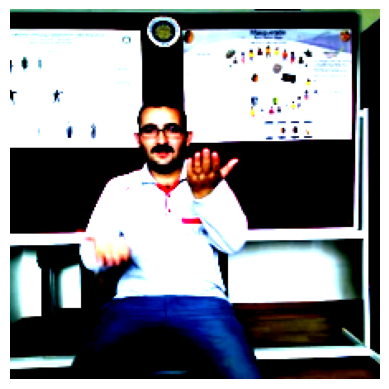

In [28]:
for i, np_image in enumerate(mixed_imgs[3].squeeze().permute(1,2,3,0)):
    print(np_image.shape)
    img_array = np.array(np_image.numpy())
    plt.imshow(img_array)
    plt.axis('off')  # Turn off axis labels and ticks

    # Save the image using plt.savefig()
    output_path = f"output/{i}.jpg"
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=300)